In [78]:
import pandas as pd 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pickle
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Chargement des données

In [33]:
digits = pd.read_csv("./data-csv/train.csv")
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y = digits["label"]
x = digits[digits.columns.drop("label")]

# Analyse

In [35]:
# evaluation du nombre de données par modélisation (ex: il y a 4684 lignes avec le label 1)
digits['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

# Découpage du jeu de données (futur modèle)

In [36]:
# reparti le set entre un set de train et un set de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y, random_state=42)

In [37]:
# nombre de fois où un label est utilisé dans l'entrainement
y_train.value_counts()

1    3138
7    2949
3    2915
9    2806
2    2799
6    2772
0    2768
4    2728
8    2722
5    2543
Name: label, dtype: int64

In [38]:
# nombre de fois où un label est utilisé dans l'entrainement
y_test.value_counts()

1    1546
7    1452
3    1436
9    1382
2    1378
6    1365
0    1364
4    1344
8    1341
5    1252
Name: label, dtype: int64

In [39]:
# on remarque que y_train.value_counts() + y_test.value_counts() = digits['label'].value_counts()
# la division du set a donc été effectuée correctement 
y_train.value_counts() + y_test.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

# Benchmark 

In [ ]:
# entrainement du dummy_classifier
dummy_classifier = DummyClassifier(strategy="uniform")
dummy_classifier.fit(x_train, y_train)

# prediction du dummy classifier
dummy_prediction = dummy_classifier.predict(x_test)
dummy_prediction

# calcule du taux d'erreur du dummy_classifier
conf_mat = confusion_matrix(y_test, dummy_prediction)
acc = conf_mat.diagonal().sum()/conf_mat.sum()
err = 1 - acc
print("taux d'erreur du dummy:", err * 100)

# Entrainement du modèle et prediction

### Decision Tree Classifier

In [ ]:
depth = range(2,20)
errors = []

for d in depth:
    modelDecisionTreeClassifier = tree.DecisionTreeClassifier(max_depth=d)
    modelDecisionTreeClassifier.fit(x_train, y_train)

    err = round((1.0 - modelDecisionTreeClassifier.score(x_test, y_test)) * 100, 3)
    errors.append(err)
    

In [ ]:
plt.plot(errors, 'b')
plt.xlabel('depth')
plt.show()

In [ ]:
OPTIMUM_DEPTH = 12
# entrainement du modèle avec la profondeur optimal
modelDecisionTreeClassifier = tree.DecisionTreeClassifier(max_depth=OPTIMUM_DEPTH)
modelDecisionTreeClassifier.fit(x_train, y_train)

# prediction sur x_test
y_prediction = modelDecisionTreeClassifier.predict(x_test)

In [ ]:
# Taux d'erreur du decisionTreeClassifier
conf_mat = confusion_matrix(y_test, y_prediction)
acc = conf_mat.diagonal().sum()/conf_mat.sum()
err = 1 - acc
print("taux d'erreur:", err * 100)

### Random Forrest Classifier

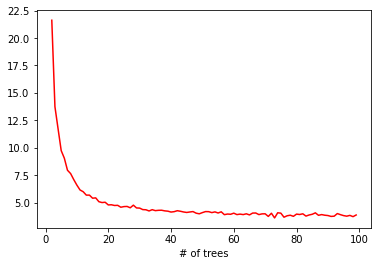

In [75]:
depth = range(2,12)
estimators_count = range(2,100)
errors = []
estimators = []
depths = []
err_default = 15

for e in estimators_count:
    estimators.append(e)
    model = RandomForestClassifier(n_estimators=e, n_jobs=-1)
    model.fit(x_train, y_train)

    err = round((1.0 - model.score(x_test, y_test)) * 100, 3)
    errors.append(err)

plt.plot(estimators, errors, 'r')
plt.xlabel('# of trees')
plt.show()

In [86]:
# Taux d'erreur par rapport au nombre d'arbres
d = {'trees': estimators, 'errors': errors}
pd.DataFrame(data=d).sort_values(by=['errors'])

,trees,errors
71,73,3.600
74,76,3.665
96,98,3.716
89,91,3.737
69,71,3.737
...,...,...
4,6,9.040
3,5,9.733
2,4,11.724
1,3,13.737


# Entrainement et prédiction optimals 

In [87]:
# entrainement optimal du modèle 
OPTIMUM_DEPTH = 12
OPTIMUM_ESTIMATORS = 73

model = RandomForestClassifier(n_estimators=OPTIMUM_ESTIMATORS)
model.fit(x_train, y_train)

# prediction sur x_test
y_prediction = model.predict(x_test)

# affichage prédiction
y_prediction

# set d'origine
y_test

3467     9
36891    6
33659    5
20365    6
8340     0
        ..
29853    5
6166     9
8253     5
27736    0
40623    5
Name: label, Length: 13860, dtype: int64

### Calcule du taux d'erreur du RandomForestClassifier

In [90]:
conf_mat = confusion_matrix(y_test, y_prediction)
acc = conf_mat.diagonal().sum()/conf_mat.sum()
err = 1 - acc
print("taux d'erreur:", err * 100)

taux d'erreur: 3.953823953823954


# Sauvegarde du modèle

In [74]:
filename = "./model.pkl"

pickle.dump(modelDecisionTreeClassifier, open(filename, 'wb'))